In [1]:
include("../EuclidElements.jl");

# Book 1

## Proposition 2

To place at a given point a straight line equal to a given straight line...

### I.1 Easy Unit

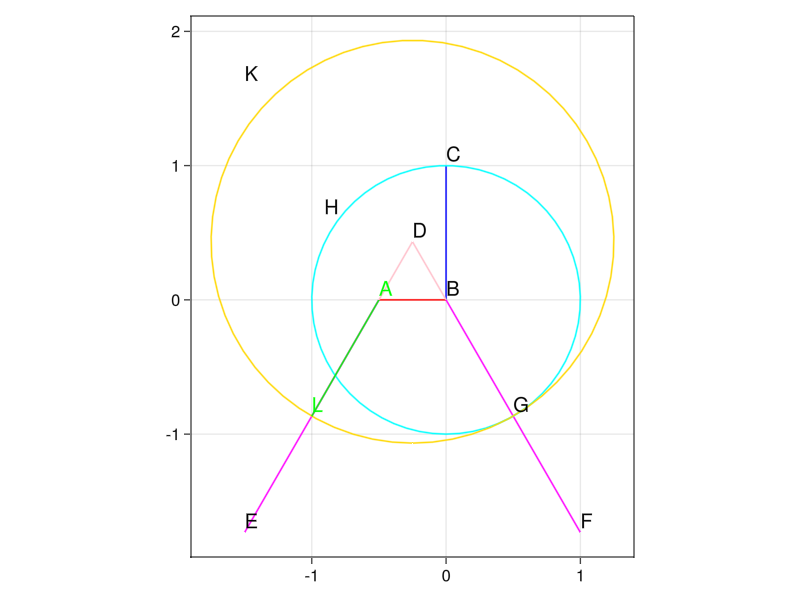

In [2]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect())

# Let A be a given point
A = Point2f(-0.5, 0)

# Let BC be a given straight line
B = Point2f(0, 0)
C = Point2f(0, 1)
BC = lines!([B,C], color=:blue)

# Draw AB
AB = lines!([A,B], color=:red)

# Draw an equilateral triangle, DAB
D = Point2f(-(1/4), (√3)/4)
DA = lines!([D, A], color=:pink)
DB = lines!([D, B], color=:pink)

#Draw straight lines AE, BF, straight from DA, DB
E = Point2f((D[1]*2)-(2*(1/2)), 2*(-(√3)/2))
AE = lines!([A,E], color=:magenta)
F = Point2f(2*(1/2), 2*(-(√3)/2))
BF = lines!([B,F], color=:magenta)

# Circle CGH with center B, radius BC (1)
CGH = lines!(Circle(B, distance(B,C)), color=:cyan)
G = Point2f(1/2, -(√3)/2)
H = Point2f(-(√2)/2 - 0.2, (√2)/2 - 0.1)

# Circle GKL with center D, radius DG (math!)
GKL = lines!(Circle(D, distance(D,G)), color=:gold)
K = Point2f(-1.5, 1.6)
L = Point2f(-1, -(√3)/2)

# Now, we know BC = BG, and DL = DG; Also, DA = DB, and AL = BG
# ergo, AL = BG, BC = BG, and thus AL = BC

#So, AL is the equal straight line drawn!
AL = lines!([A,L], color=:green1)

#Now draw the point labels, highlighting A and L!
Apoint = text!(A, text="A", color=:green1)
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")
Epoint = text!(E, text="E")
Fpoint = text!(F, text="F")
Gpoint = text!(G, text="G")
Hpoint = text!(H, text="H")
Kpoint = text!(K, text="K")
Lpoint = text!(L, text="L", color=:green1)

#Draw and show the chart :)
current_figure()

### I.2 Rotated and Difficult

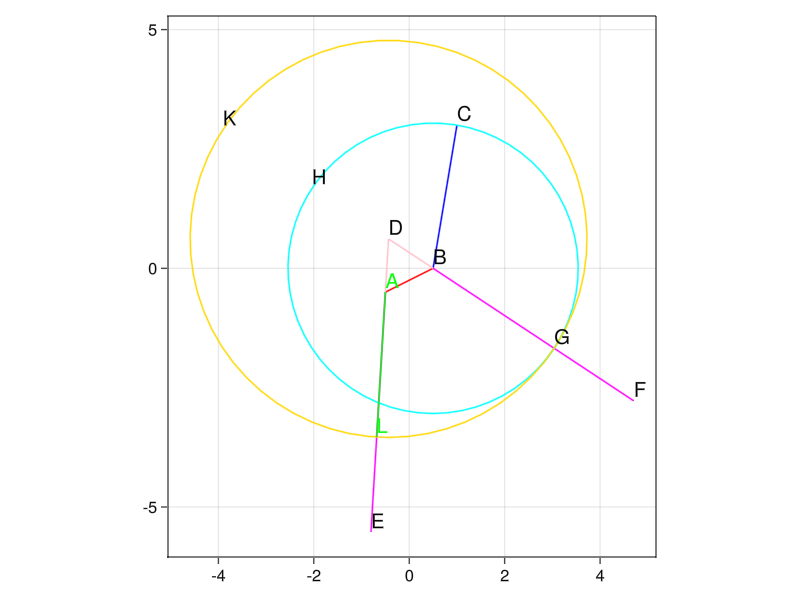

In [3]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect())

# Let A be a given point
A = Point2f(-0.5, -0.5)

# Let BC be a given straight line
B = Point2f(0.5, 0)
C = Point2f(1, 3)
BC = lines!([B,C], color=:blue)

# Draw AB
AB = lines!([A,B], color=:red)

# Draw an equilateral triangle, DAB
D = equilateral_from(A,B)
DA = lines!([D, A], color=:pink)
DB = lines!([D, B], color=:pink)

#Draw straight lines AE, BF, straight from DA, DB
r_BC = distance(B, C)
E = continue_line(D, A, r_BC + 2)
AE = lines!([A,E], color=:magenta)

F = continue_line(D, B, r_BC + 2)
BF = lines!([B,F], color=:magenta)

# Circle CGH with center B, radius BC (1)
r_CGH = distance(B,C)
CGH = lines!(Circle(B, r_CGH), color=:cyan)
G = continue_line(D, B, r_CGH)
H = continue_line(B, D, r_CGH - distance(B,D))

# Circle GKL with center D, radius DG (math!)
r_GKL = distance(D,G)
GKL = lines!(Circle(D, r_GKL), color=:gold)
L = continue_line(D, A, r_GKL - distance(D,A))
K = continue_line(B, D, distance(D,G))

# Now, we know BC = BG, and DL = DG; Also, DA = DB, and AL = BG
# ergo, AL = BG, BC = BG, and thus AL = BC

#So, AL is the equal straight line drawn!
AL = lines!([A,L], color=:green1)

#Now draw the point labels, highlighting A and L!
Apoint = text!(A, text="A", color=:green1)
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")
Epoint = text!(E, text="E")
Fpoint = text!(F, text="F")
Gpoint = text!(G, text="G")
Hpoint = text!(H, text="H")
Kpoint = text!(K, text="K")
Lpoint = text!(L, text="L", color=:green1)

#Draw and show the chart :)
current_figure()

### Function

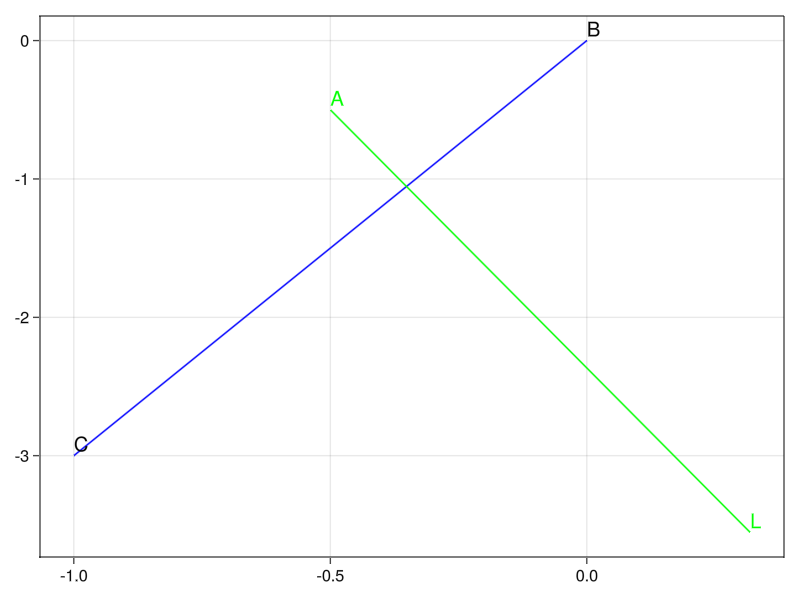

In [4]:
# At one given point, get a point to draw a line equal to a line from 2 given points
function equal_line(A::Point2, B::Point2, C::Point2)
    # Get an equilateral triangle, DAB
    D = equilateral_from(A,B)

    #Get straight lines AE, BF, straight from DA, DB
    r_BC = distance(B,C)
    E = continue_line(A, D, r_BC + 2)
    F = continue_line(B, D, r_BC + 2)

    # Circle CGH with center B, radius BC
    r_CGH = distance(B,C)
    G = continue_line(D, B, r_CGH)

    # Circle GKL with center D, radius DG
    r_GKL = distance(D,G)
    L = continue_line(D, A, r_GKL - distance(D,A))

    L
end;

# Let A be a given point
A = Point2f(-0.5, -0.5)

# Let BC be a given straight line
B = Point2f(0, 0)
C = Point2f(-1, -3)

#Get the equal line
L = equal_line(A, B, C)

#setup the chart space...
f = Figure()
ax = Axis(f[1,1])

#Draw BC
BC = lines!([B,C], color=:blue)

#So, AL is the equal straight line drawn!
AL = lines!([A,L], color=:green1)

#Now draw the point labels, highlighting A and L!
Apoint = text!(A, text="A", color=:green1)
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Lpoint = text!(L, text="L", color=:green1)

#Draw and show the chart :)
current_figure()

### ANIMATION

In [5]:
# Let A be a given point
A_0 = Point2f(-0.5, -0.5)
A = Observable(Point2f(-0.5, -0.5))

# Let BC be a given straight line
B = Observable(Point2f(0.5, 0))
C_0 = Point2f(1, 3)
C = Observable(Point2f(1, 3))

# Draw an equilateral triangle, DAB
D = @lift(equilateral_from($A,$B))

#Draw straight lines AE, BF, straight from DA, DB
r_BC = @lift(distance($B, $C))
E = @lift(continue_line($D, $A, $r_BC + 2))

F = @lift(continue_line($D, $B, $r_BC + 2))

# Circle CGH with center B, radius BC (1)
r_CGH = @lift(distance($B,$C))
G = @lift(continue_line($D, $B, $r_CGH))
H = @lift(continue_line($B, $D, $r_CGH - distance($B,$D)))

# Circle GKL with center D, radius DG (math!)
r_GKL = @lift(distance($D,$G))
L = @lift(continue_line($D, $A, $r_GKL - distance($D,$A)))
K = @lift(continue_line($B, $D, distance($D,$G)))


#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect())
xlims!(ax, -7,8)
ylims!(ax, -7,8)

#Now draw it all
BC = lines!(@lift([$B, $C]), color=:blue)
AB = lines!(@lift([$A, $B]), color=:red)
DA = lines!(@lift([$D, $A]), color=:pink)
DB = lines!(@lift([$D, $B]), color=:pink)
AE = lines!(@lift([$A, $E]), color=:magenta)
BF = lines!(@lift([$B, $F]), color=:magenta)
CGH = lines!(@lift(Circle($B, $r_CGH)), color=:cyan)
GKL = lines!(@lift(Circle($D, $r_GKL)), color=:gold)
AL = lines!(@lift([$A, $L]), color=:green1)

#Now draw the point labels, highlighting A and L!
Apoint = text!(A, text="A", color=:green1)
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")
Epoint = text!(E, text="E")
Fpoint = text!(F, text="F")
Gpoint = text!(G, text="G")
Hpoint = text!(H, text="H")
Kpoint = text!(K, text="K")
Lpoint = text!(L, text="L", color=:green1)

# Draw the animation!
framerate = 24
d_s = 6
timestamps = range(0,2π, step=2π/(d_s*framerate))

record(f, "Euclid-I-2.gif", timestamps; framerate=framerate) do t
    calc_new_A = [cos(t) sin(t); -sin(t) cos(t)]*A_0
    new_A = Point2f(calc_new_A[1], calc_new_A[2])
    A[] = new_A

    calc_new_C = [cos(t) -sin(t); sin(t) cos(t)]*C_0
    new_C = Point2f(calc_new_C[1], calc_new_C[2])
    sup_C = continue_line(B[], new_C, sin(t))
    C[] = sup_C
end;

![animation](Euclid-I-2.gif)